# Python-in-the-lab: Basic Elements II

In [1]:
import os
import numpy as np
import scipy
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
# Today we use another file
filename = "F64ac_0.02_time_V_T.dat"
filename = os.path.join(mainDir, filename) # What's the difference between lecture 1?
data = np.loadtxt(filename, comments="#")

In [3]:
# The data loaded are 9 cols of 501 points: the first col is the time, 
# common to all, the others are 8 different amplitudes
data.shape

(501, 9)

In [4]:
time = data[:,0]
type(time)

numpy.ndarray

In [5]:
data[:5]

array([[ 0.        ,  0.04340427,  0.03031505,  0.02843981,  0.02410855,
         0.0181934 ,  0.01021206,  0.01017855,  0.00693918],
       [ 0.002     ,  0.06169817,  0.0521141 ,  0.05257901,  0.04995166,
         0.04529933,  0.04055326,  0.04091501,  0.03792067],
       [ 0.004     ,  0.07999208,  0.07391315,  0.0767182 ,  0.07579477,
         0.07240526,  0.07089447,  0.07165146,  0.06890216],
       [ 0.006     ,  0.09828599,  0.09571219,  0.1008574 ,  0.10163788,
         0.0995112 ,  0.10123567,  0.10238792,  0.09988365],
       [ 0.008     ,  0.11657989,  0.11751124,  0.12499659,  0.127481  ,
         0.12661713,  0.13157687,  0.13312437,  0.13086514]])

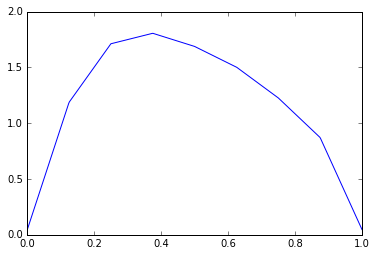

In [6]:
# Let's plot one of them
plt.plot(time, data[:,1],'-');

In [7]:
# The first line of the file containts the labels for the columns: how to read it?
with open(filename) as f:
    header = f.readline() # See the change. It just reads a single line (the first in this case)

In [8]:
header

'#T \t1.59E-004\t2.21E-004\t3.06E-004\t4.26E-004\t5.92E-004\t8.22E-004\t1.14E-003\t1.59E-003\n'

In [9]:
header.split() # No need to add \t nor \r\n. You already know it.

['#T',
 '1.59E-004',
 '2.21E-004',
 '3.06E-004',
 '4.26E-004',
 '5.92E-004',
 '8.22E-004',
 '1.14E-003',
 '1.59E-003']

In [10]:
# Let's collect the float from the strings except the first
sizes = [float(size) for size in header.split()[1:]]
sizes

[0.000159, 0.000221, 0.000306, 0.000426, 0.000592, 0.000822, 0.00114, 0.00159]

## Introduction to Dictionaries

See https://docs.python.org/2/tutorial/datastructures.html?highlight=dictionary#dictionaries

In [11]:
# Let's now put the 8 amplitudes in a dictionary 
shapes = {}
# A dictionary can be initialized also as : shapes = dict()
type(shapes)

dict

Dictionary are objects where each element has a "key".

In [12]:
# Let's now put the 8 columns in the dict. Note the use of enumerate, and the loop on the cols
for i, size in enumerate(sizes):
    shapes[size] = data[:,i+1]

In [13]:
# in shapes[size], size is a "key" of the dictionary "shapes" 
shapes.keys()

dict_keys([0.000159, 0.000221, 0.000822, 0.000426, 0.000592, 0.00114, 0.00159, 0.000306])

In [14]:
# Let's have a look to the keys
print(shapes.keys())
# They are not sorted!
print(sorted(shapes.keys()))

dict_keys([0.000159, 0.000221, 0.000822, 0.000426, 0.000592, 0.00114, 0.00159, 0.000306])
[0.000159, 0.000221, 0.000306, 0.000426, 0.000592, 0.000822, 0.00114, 0.00159]


In [15]:
# Note that this surprisingly works! (from Python version 2.6, I guess)
sorted(shapes.keys()) == sorted(shapes)

True

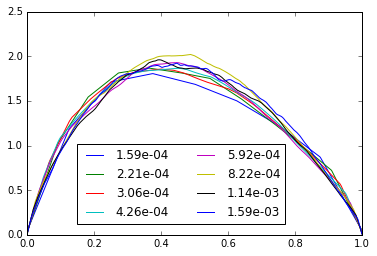

In [16]:
# Let's plot the 8 curves using the dictionary
for size in sorted(shapes):
    lb = "{0:.2e}".format(size)
    plt.plot(time, shapes[size], label=lb)
plt.legend(ncol=2,loc=(0.15,.05));

# Problem
# Scale all curves so they have the same integral = 1

Let's explore scipy. It is a huge [Open Source Library for Scientific Computing](https://www.scipy.org/)

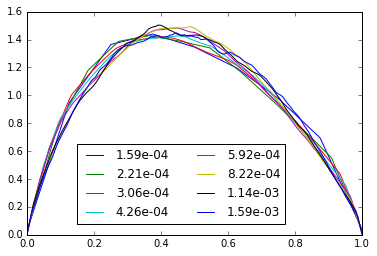

In [17]:
from scipy.integrate import trapz
for size in sorted(shapes):
    lb = "{0:.2e}".format(size)
    shape = shapes[size]
    shape = shape/trapz(shape,time)
    plt.plot(time, shape, label=lb)
plt.legend(ncol=2,loc=(0.15,.05))

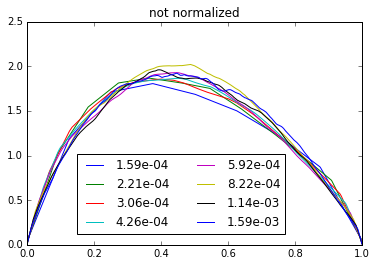

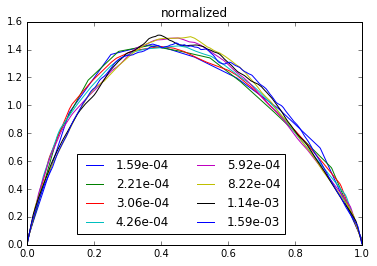

In [18]:
# How to quickly plot two figures
for i in range(2):
    plt.figure()
    for size in sorted(shapes):
        lb = "{0:.2e}".format(size)
        if i: # Note the trick
            norm = trapz(shapes[size], time)
            title = "normalized"
        else:
            norm = 1
            title = "not normalized"
        plt.plot(time, shapes[size]/norm, label=lb)
    plt.legend(ncol=2,loc=(0.15,.05))
    plt.title(title)


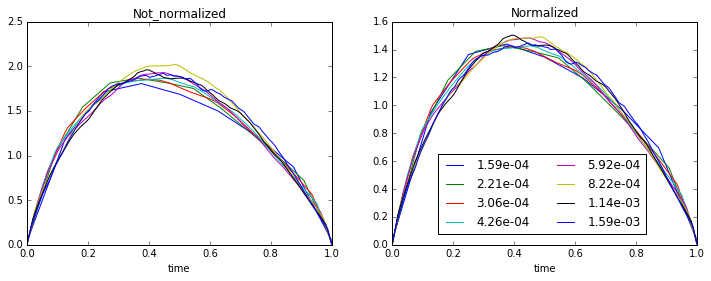

In [19]:
# Plot them together
fig, axs = plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    for size in sorted(shapes):
        lb = "{0:.2e}".format(size)
        if i: # Note the trick
            norm = trapz(shapes[size], time)
        else:
            norm = 1
        axs[i].plot(time, shapes[size]/norm, label=lb)
    axs[i].set_xlabel("time")
axs[1].legend(ncol=2,loc=(0.15,.05))
axs[0].set_title("Not_normalized")
axs[1].set_title("Normalized");

## Can we plot the two plots in the same figure?

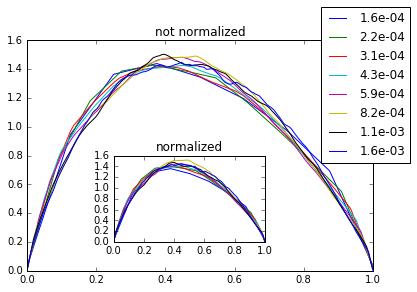

In [20]:
# How to quickly plot two figures
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([0.3, 0.2, 0.35, 0.3])
for i in range(2):
    for size in sorted(shapes):
        lb = "{0:.1e}".format(size)
        if i: # Note the trick
            norm = trapz(shapes[size], time)
            ax1.plot(time, shapes[size]/norm, label=lb)
            ax1.legend(ncol=1,loc=(.85,.47))
        else:
            ax2.plot(time, shapes[size]/norm, label=lb)
ax1.set_title("not normalized")
ax2.set_title("normalized")
#fig.savefig("shapes.png", dpi=200)

# Next Problems
## 1. Make the average of the 8 normalized curves (You can do it)
## 2. Make a fit of the average curve with 
## $[x(1-x)]^\gamma * exp(-Ax)$, 

## with $A, \gamma$ as fitting parameters. (You can do it. Look for curve_fit)

### Try to solve the problem above by yourself. Anyway, a possible solution is found below

In [21]:
# Get the average of the 8 curves
#average = np.zeros_like(shapes[size])
average = 0
for size in shapes:
    shape = shapes[size]
    average += shape/trapz(shape,time)
average /= len(shapes)
type(average) == type(shapes[size])

True

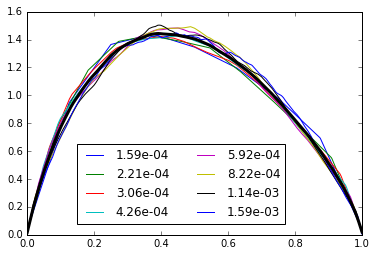

In [22]:
# Replot for comparison with the average
for size in sorted(shapes):
    lb = "{0:.2e}".format(size)
    shape = shapes[size]
    norm = trapz(shapes[size], time)
    plt.plot(time, shapes[size]/norm, label=lb)
plt.legend(ncol=2,loc=(0.15,.05))
plt.plot(time, average, 'k', lw=3)

In [35]:
# Introduction to functions and fitting function
parameters = ["gamma", "A1", "A2"]
def fitShape(x, gamma, a1, a2):
    """
    fitting function for the average shape
    
    Parameters:
    ===========
    a1: float
        amplitude
    a2: float
        constant of the exponential
    gamma: float
        exponent of the shape
    """
    return a1*(x*(1-x))**(gamma-1) * np.exp(-a2*x)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitShape, time, average)
for p, diag, parameter in zip(popt,pcov.diagonal(),parameters):
    print("Parameter {0} = {1:.3f} +/- {2:.3f}".format(parameter, p, diag**0.5))
#pcov.diagonal()**0.5 # These are the errors of the fitting parameters at 1 sigma

Parameter gamma = 1.802 +/- 0.002
Parameter A1 = 5.613 +/- 0.017
Parameter A2 = 0.549 +/- 0.002


### Hold on! I guess there are too many parameters... 

Yes, the average should have an integral equal to 1, or not?

Let's check it

In [37]:
trapz(average, time)

1.0

## Ahah.. so? How do we change the fitting function?

In [38]:
# Introduction to functions and fitting function
parameters = ["gamma", "A"]
def fitShape(x, gamma, a):
    """
    fitting function for the average shape
    
    Parameters:
    ===========
    a: float
        constant of the exponential
    gamma: float
        exponent of the shape
    """
    f = (x*(1-x))**(gamma-1) * np.exp(-a * x)
    norm = trapz(f, x)
    return f/norm

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitShape, time, average)
for p, diag, parameter in zip(popt,pcov.diagonal(),parameters):
    print("Parameter {0} = {1:.3f} +/- {2:.3f}".format(parameter, p, diag**0.5))
#pcov.diagonal()**0.5 # These are the errors of the fitting parameters at 1 sigma

Parameter gamma = 1.802 +/- 0.001
Parameter A = 0.549 +/- 0.002


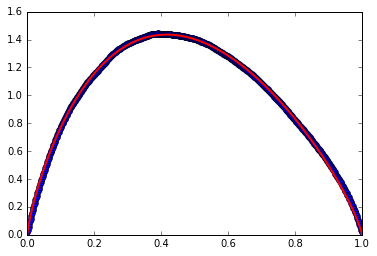

In [24]:
plt.plot(time, average, 'bo')
plt.plot(time, fitShape(time, *popt), '-r', lw=2) # Note the use of *popt

## Introduction to classes

In [25]:
# Introduction to classes
class Shape: # Note the Capital
    def __init__(self,y,x): # Initialization
        self.x = x
        self.y = y
        self.norm = trapz(y,x)
    
    def y_norm(self):
        return self.y/self.norm

In [26]:
s1 = Shape(shapes[0.000159],time)

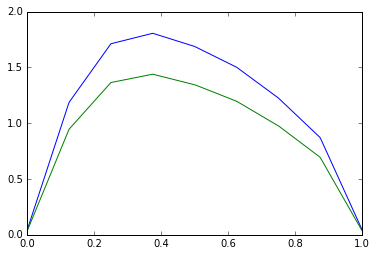

In [27]:
plt.plot(s1.x, s1.y, s1.x, s1.y_norm())

In [28]:
# Introduction to classes: your first (and only) decorator
class Shape: # Note the Capital
    def __init__(self,y,x): # Initialization
        self.x = x
        self.y = y
        self.norm = trapz(y,x)
    
    @property
    def y_norm(self):
        return self.y/self.norm

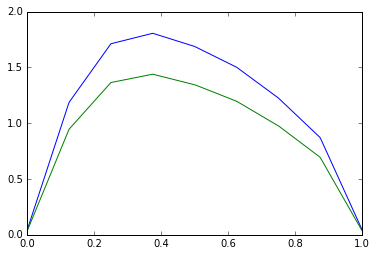

In [29]:
s1 = Shape(shapes[0.000159],time)
plt.plot(s1.x, s1.y, s1.x, s1.y_norm)

In [30]:
# To keep the order of the keys
from collections import OrderedDict
dictShapes = OrderedDict()

for i,size in enumerate(sizes):
    dictShapes[size] = Shape(data[:,i+1], time)

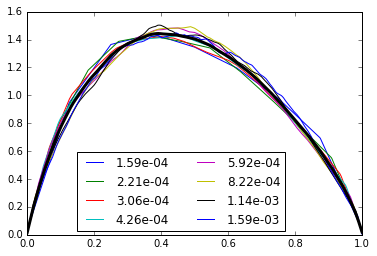

In [31]:
average = np.zeros_like(dictShapes[size].y)
for size in dictShapes:
    s = dictShapes[size]
    label = "{0:.2e}".format(size)
    plt.plot(s.x, s.y_norm, label=label)
    average += s.y_norm
average /= len(dictShapes)
plt.plot(time, average,'k',lw=3)
plt.legend(loc=(.15,.015),ncol=2);

### Classes can redefine operations

In [32]:
class Rectangle:
    """
    This class defines operations on Rectangles
    """
    def __init__(self, base, height):
        self.base = base
        self.height = height
        self.area = base * height
        self.p = self._get_perim()
        self._diagonal = (base*base + height * height)**0.5 
    
    def _get_perim(self, half=False):
        """
        Get the perimeter of the Rectange
        Parameters:
        ----------
        half: Bool.
             If True, get the semiperimeter
        """
        p = self.base + self.height
        if half:
            return p
        else:
            return 2 * p
        
    def print_perimeter(self):
        return "The perimeter is %f" % self.p
    
    def __add__(self, other):
        base = self.base + other.base
        height = self.height + other.height
        return Rectangle(base,height)
    
    def __repr__(self):
        return "Rectangle of {0} by {1}".format(self.base, self.height)

p0 = Rectangle(3,2)
p1 = Rectangle(1,1)
p2 = Rectangle(2,0.5)

In [33]:
print p0.base, p0.height, p0.p, p0.area
p0.print_perimeter()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-33-53d23a1eb001>, line 1)

In [ ]:
# Construct a larger Rectange
p3 = p0 + p1
print p3.base, p3.height, p3.p, p3.area

In [ ]:
p3